In [20]:
#!wget http://deeplearning.net/data/mnist/mnist.pkl.gz

In [21]:
#!ln -s fastaicover/fastai

In [1]:
%matplotlib inline
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt

In [2]:
((x, y), (x_valid, y_valid), _)  = pickle.load(gzip.open('mnist.pkl.gz', 'rb'),encoding='latin-1')

In [3]:
type(x),x.shape,type(y),y.shape

(numpy.ndarray, (50000, 784), numpy.ndarray, (50000,))

In [4]:
mean = np.mean(x)
std = np.std(x)

In [5]:
mean,std

(0.13044983, 0.3072898)

In [6]:
x = (x - mean)/std

In [7]:
x_valid = (x_valid - mean)/std

In [8]:
x.mean(),x.std()

(-3.1638146e-07, 0.99999934)

In [9]:
x[0].shape

(784,)

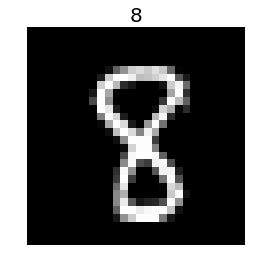

In [10]:
plt.imshow(np.reshape(x_valid[1],(28,28)),cmap = 'gray')
plt.title(y_valid[1],{'fontsize':20})
plt.axis('off')
plt.show()

In [108]:
def plots(imgs,titles = None,rows = 2):
    fig = plt.figure(figsize=(12,9))
    cols = len(imgs)//rows
    for i in range(len(imgs)):
        sub = fig.add_subplot(rows,cols,i+1)
        sub.axis('off')
        plt.imshow(np.reshape(x_valid[i],(28,28)),cmap = 'gray')
        if titles is not None:
            plt.title(y_valid[i],{'fontsize':20})
            
def show(imgs,titles = None):
    plt.imshow(np.reshape(imgs,(28,28)),cmap = 'gray')
    plt.axis('off')
    if titles is not None:
        plt.title(titles,{'fontsize':20})
        

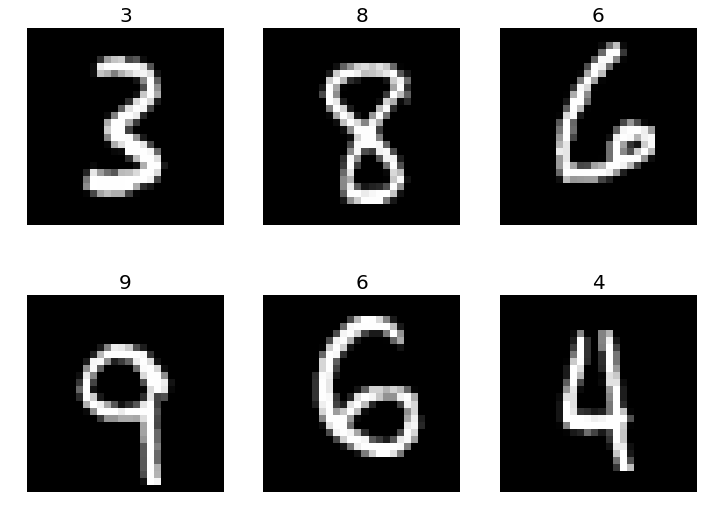

In [12]:
plots(x_valid[:6],y_valid[:6])

In [13]:
import torch.nn as nn
from fastai.model import *
from fastai.dataset import *
from fastai.metrics import *

In [14]:
net = nn.Sequential(nn.Linear(28*28,10),
                    nn.LogSoftmax()
                   )

In [15]:
md = ImageClassifierData.from_arrays('',(x,y), (x_valid, y_valid))

In [16]:
loss =nn.NLLLoss()
metrics = [accuracy]
opt = optim.SGD(net.parameters(),1e-1)

In [17]:
fit(net, md, n_epochs=5, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                     
    0      0.31076    0.368146   0.8898    
    1      0.318402   0.29962    0.9147                       
    2      0.31798    0.347017   0.8982                       
    3      0.311001   0.626045   0.813                        
    4      0.308329   0.315291   0.913                        



[array([0.31529]), 0.913]

In [18]:
set_lrs(opt,1e-2)

In [19]:
fit(net, md, n_epochs=5, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                     
    0      0.27855    0.264276   0.9302    
    1      0.250145   0.261776   0.9296                       
    2      0.249591   0.260815   0.9304                       
    3      0.240225   0.259824   0.9309                       
    4      0.246841   0.260995   0.9292                       



[array([0.26099]), 0.9292]

In [158]:
preds = predict(net,md.val_dl)

In [159]:
preds.shape

(10000, 10)

In [160]:
preds = preds.argmax(axis = 1)

In [161]:
preds

array([3, 8, 6, ..., 5, 6, 8])

In [173]:
np.mean(preds == y_valid)

0.9292

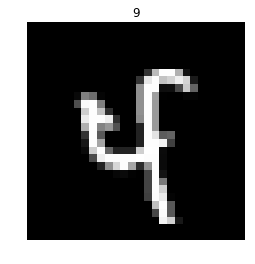

In [207]:
temp = np.random.choice(np.nonzero(preds!= y_valid)[0],1)[0]
plt.imshow(np.reshape(x_valid[temp,:],(28,28)),cmap = 'gray')
plt.title(preds[temp])
plt.axis ('off')
plt.show()

In [218]:
def softmax(x): return torch.exp(x)/torch.exp(x).sum(dim=1)

In [219]:
def get_weights(*dims): return nn.Parameter(torch.randn(dims)/dim[0])

In [247]:
class LogReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1_w = get_weights(28*28,10*10) #Weigths
        self.l1_b = get_weights(10) #Bias
    
    def forward(self,x):
        x = x.view(x.size(0),-1)
        x = torch.matmul(x,l1_w) + l1_b
        x = torch.log(softmax(x))
        
        return x

In [248]:
opt = optim.Adam(net.parameters())

In [249]:
fit(net,md,5,opt,loss,metrics)

epoch      trn_loss   val_loss   accuracy                     
    0      0.248676   0.274692   0.9264    
    1      0.261267   0.274294   0.9264                       
    2      0.250897   0.279433   0.9239                       
    3      0.244216   0.277322   0.9261                       
    4      0.245858   0.273139   0.9261                       



[array([0.27314]), 0.9261]

In [231]:
preds = predict(net,md.val_dl)

In [233]:
preds = preds.argmax(axis = 1)

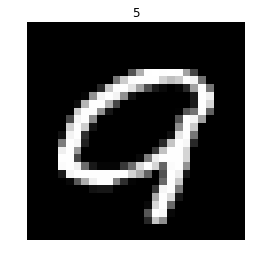

In [240]:
temp = np.random.choice(np.nonzero(preds!= y_valid)[0],1)[0]
plt.imshow(np.reshape(x_valid[temp,:],(28,28)),cmap = 'gray')
plt.title(preds[temp])
plt.axis('off')
plt.show()